In [1]:
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)

In [3]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [4]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [5]:
28 * 28 

784

In [6]:
X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values


In [7]:
y_test = df_test.iloc[:, 0].values

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train.max(), X_train.min()

(255, 0)

In [10]:
type(X_train)

numpy.ndarray

In [11]:
a = X_train.flatten()

In [12]:
len(a)

47040000

In [13]:
60000 * 784

47040000

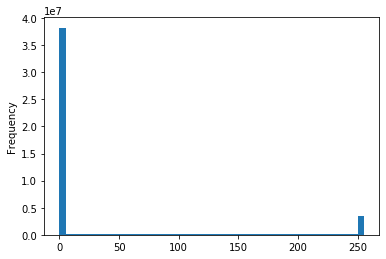

In [14]:
pd.Series(a).plot.hist(bins = 50)

In [15]:
len(a[a==0])/len(a)

0.8087977040816327

In [16]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [17]:
X_train = df_train.iloc[:, 1:].values/255
y_train = df_train.iloc[:, 0].values

In [18]:
X_train.dtype

dtype('float64')

In [19]:
import sys

In [20]:
sys.getsizeof(X_train)

376320112

In [7]:
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255

In [22]:
X_train = X_train.astype("uint8")

In [23]:
X_train.dtype

dtype('uint8')

In [24]:
sys.getsizeof(X_train)

47040112

In [25]:
376320112/47040112

7.999983333373016

In [26]:
X_train[0].shape

(784,)

In [27]:
X_train[0].reshape((28, 28)).shape

(28, 28)

In [15]:
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255

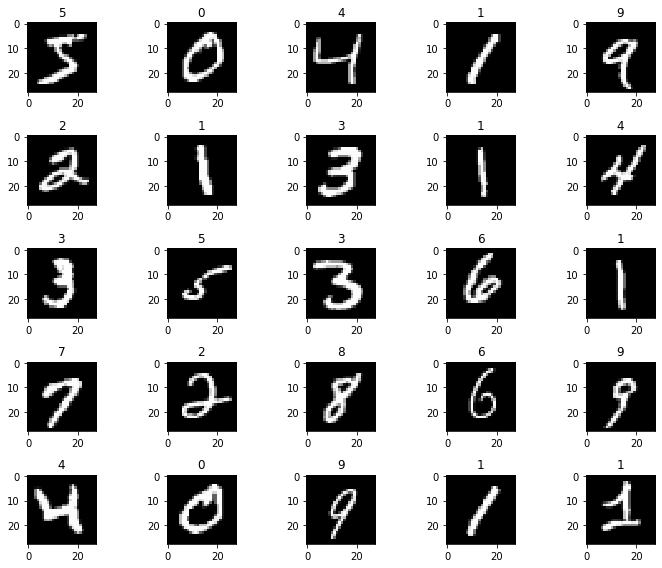

In [29]:
fig, axes = plt.subplots(5, 5, figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap="gray")
    ax.set_title(y_train[i])
    
plt.tight_layout()

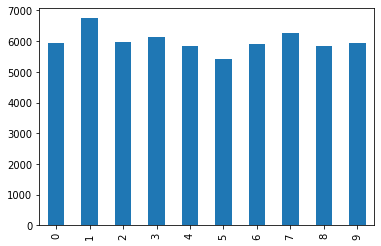

In [30]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [31]:
from sklearn import * 

In [32]:
est = linear_model.SGDClassifier(loss="log", alpha=0.1, penalty="l2", n_jobs = 8
                    , max_iter=1000, random_state=34, learning_rate="invscaling", eta0 = 0.01)

In [33]:
%%time 
est.fit(X_train, y_train)

CPU times: user 18.5 s, sys: 141 ms, total: 18.6 s
Wall time: 3.79 s


SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=8, penalty='l2', power_t=0.5,
              random_state=34, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [34]:
est.n_iter_

16

In [35]:
y_train_pred = est.predict(X_train)

In [36]:
y_test_pred = est.predict(X_test)

In [37]:
metrics.accuracy_score(y_train, y_train_pred)

0.8494666666666667

In [38]:
metrics.accuracy_score(y_test, y_test_pred)

0.8567

In [39]:
y_test_prob = est.predict_proba(X_test)

In [40]:
y_test_prob.shape

(10000, 10)

In [41]:
y_test_prob[0]

array([0.05425586, 0.01719748, 0.04826791, 0.07164087, 0.04870429,
       0.03906757, 0.01586605, 0.53261402, 0.04855191, 0.12383404])

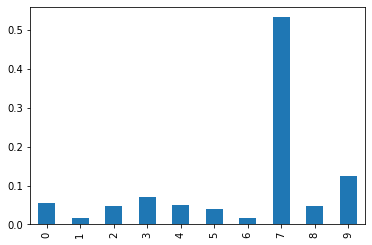

In [42]:
pd.Series(y_test_prob[0]).plot.bar()

In [43]:
y_test_pred[0]

7

In [44]:
metrics.log_loss(y_test, y_test_prob)

0.9177177167735101

In [45]:
import tensorflow as tf

In [46]:
a = tf.constant(2.0, name = "a")

In [47]:
a

<tf.Tensor 'a:0' shape=() dtype=float32>

In [48]:
b = tf.constant(3.0, name = "b")

In [49]:
b

<tf.Tensor 'b:0' shape=() dtype=float32>

In [50]:
c = tf.constant(2.0, name = "c")

In [51]:
c

<tf.Tensor 'c:0' shape=() dtype=float32>

In [52]:
d = a + b

In [53]:
d

<tf.Tensor 'add:0' shape=() dtype=float32>

In [54]:
with tf.Session() as sess:
    d_ = sess.run(d)
    print(d_)

5.0


In [55]:
def multiply(a, b):
    a_ = tf.placeholder(tf.float32)
    b_ = tf.placeholder(tf.float32)
    c = a_ * b_
    with tf.Session() as session:
        args = {a_: a, b_: b}
        c_ = session.run([c], feed_dict=args)
        return c_
    
multiply(2.3, 10)

[23.0]

In [57]:
import numpy as np

In [58]:
def multiply(a, b):
    a_ = tf.placeholder(tf.float32, shape=(3, 1))
    b_ = tf.placeholder(tf.float32, shape=(3, 1))
    c = tf.matmul(tf.transpose(a_), b_)
    d = tf.add(a_, b_)
    with tf.Session() as session:
        args = {a_: a, b_: b}
        c_, d_ = session.run([c, d], feed_dict=args)
        return c_, d_
    
c_, d_ = multiply(np.array([[1.0, 2.0, 3.0]]).T, np.array([[1.0, 0.0, -1.0]]).T)

In [59]:
c_

array([[-2.]], dtype=float32)

In [60]:
d_

array([[2.],
       [2.],
       [2.]], dtype=float32)

In [61]:
np.array([[1.0, 2.0, 3.0]]).T

array([[1.],
       [2.],
       [3.]])

In [62]:
np.array([[1.0, 0.0, -1.0]]).T

array([[ 1.],
       [ 0.],
       [-1.]])

In [63]:
y_train.shape

(60000,)

In [16]:
X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

Y_train.shape

(60000, 10)

In [70]:
Y_train[:3, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
y_train[:3]

array([5, 0, 4])

In [8]:
from tensorflow import keras
from time import time 

In [75]:
tensorfboard = keras.callbacks.TensorBoard(log_dir="/tmp/tboard/%d" % time())


model = keras.Sequential([
    keras.layers.InputLayer((784, )), 
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.SGD(lr=0.01)
              , loss=keras.losses.categorical_crossentropy
              , metrics=["accuracy"])

model.summary()


model.fit(X_train, Y_train, validation_data=(X_test, Y_test)
          , batch_size=32, epochs=20, callbacks=[tensorfboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.6300 - acc: 0.8384 - val_loss: 0.3526 - val_acc: 0.9049
Epoch 2/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3339 - acc: 0.9073 - val_loss: 0.2908 - val_acc: 0.9203
Epoch 3/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2859 - acc: 0.9200 - val_loss: 0.2613 - val_acc: 0.9268
Epoch 4/20
60000/60000 [==============================] - 3s 48us/s

In [10]:
X_train_3d = X_train.reshape(-1, 28, 28, 1)
X_test_3d = X_test.reshape(10000, 28, 28, 1)
X_train_3d.shape

(60000, 28, 28, 1)

In [11]:
import os

In [12]:
os.environ.get("PATH")

'/Users/abasar/.local/bin:/anaconda3/condabin:/Users/abasar/google-cloud-sdk/bin:/usr/local/opt/mysql-client/bin:/Users/abasar/Applications/apache-cassandra-3.11.3/bin/:/anaconda3/bin:/bin:/Users/abasar/Applications/apache-maven-3.6.0/bin/:/Users/abasar/Applications/spark-2.2.3-bin-hadoop2.7/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin'

In [17]:
X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

Y_train.shape

(60000, 10)

In [18]:
tensorfboard = keras.callbacks.TensorBoard(log_dir="/tmp/mnist/%d" % time())

model = keras.Sequential([
    keras.layers.InputLayer((28,28,1)), 
    keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu"),
    keras.layers.MaxPool2D(padding="SAME"),
    keras.layers.Conv2D(64, kernel_size=(5,5), activation="relu"),
    keras.layers.MaxPool2D(padding="SAME"),
    keras.layers.Flatten(),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.SGD(lr=0.01
              , decay=1e-05 )
              , loss=keras.losses.categorical_crossentropy
              , metrics=["accuracy"])

model.summary()


model.fit(X_train_3d, Y_train, validation_data=(X_test_3d, Y_test)
          , batch_size=32, epochs=20, callbacks=[tensorfboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 400)               410000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               40100     
__________

In [21]:
tensorfboard = keras.callbacks.TensorBoard(log_dir="/tmp/mnist/%d" % time())


model = keras.Sequential([
    keras.layers.InputLayer((28,28,1)), 
    keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu"),
    keras.layers.MaxPool2D(padding="VALID"),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPool2D(padding="VALID"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.Adam(lr=0.001, )
              , loss=keras.losses.categorical_crossentropy
              , metrics=["accuracy"])

model.summary()


model.fit(X_train_3d, Y_train, validation_data=(X_test_3d, Y_test)
          , batch_size=32, epochs=20, callbacks=[tensorfboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 400)               640400    
__________

In [24]:
y_test_pred = model.predict_classes(X_test_3d)

In [25]:
y_test_pred

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
summary = pd.DataFrame({"actual": y_test, "predict": y_test_pred})

In [28]:
summary["error"] = summary.actual != summary.predict

In [29]:
summary.head()

,actual,predict,error
0,7,7,False
1,2,2,False
2,1,1,False
3,0,0,False
4,4,4,False


In [31]:
summary[summary.error].shape

(69, 3)

In [32]:
summary[summary.error].actual.value_counts()

9    18
7    10
6    10
4     8
3     7
5     6
8     4
2     3
1     3
Name: actual, dtype: int64

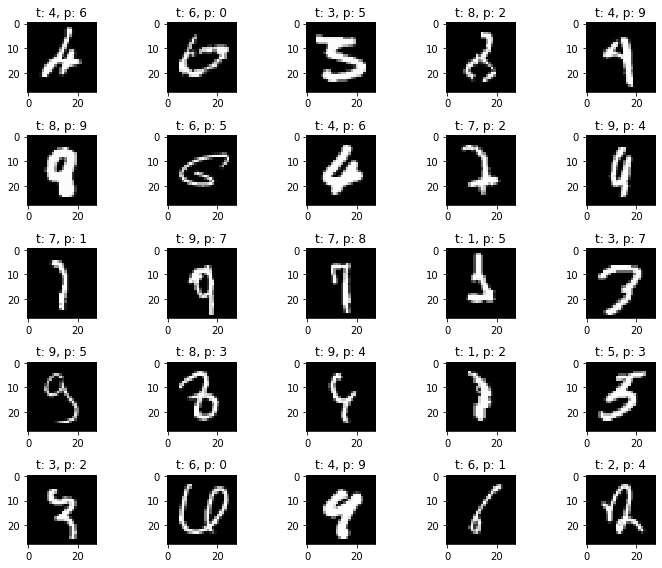

In [41]:
fig, axes = plt.subplots(5, 5, figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[summary.error][i].reshape((28, 28)), cmap="gray")
    title = "t: %d, p: %d" % (y_test[summary.error][i], y_test_pred[summary.error][i])
    ax.set_title(title)
    
    
plt.tight_layout()

In [43]:
summary.columns

Index(['actual', 'predict', 'error'], dtype='object')

In [49]:
agg = summary[summary.error].groupby(["actual", "predict"]).count().unstack().fillna(0)

In [50]:
agg

error                                             
predict     0    1    2    3    4    5    6    7    8    9
actual                                                    
1         0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0
2         0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0
3         0.0  0.0  1.0  0.0  0.0  3.0  0.0  2.0  1.0  0.0
4         0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  6.0
5         1.0  0.0  0.0  3.0  0.0  0.0  1.0  0.0  1.0  0.0
6         3.0  1.0  0.0  0.0  2.0  1.0  0.0  0.0  3.0  0.0
7         0.0  2.0  6.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0
8         0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  2.0
9         0.0  0.0  0.0  2.0  5.0  8.0  0.0  3.0  0.0  0.0

In [51]:
import seaborn as sns

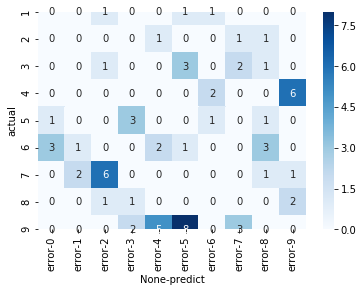

In [54]:
sns.heatmap(agg, cmap="Blues", annot=True)

In [56]:
from skimage import io

In [57]:
a = io.imread("/Users/abasar/Downloads/horse.jpeg")

In [59]:
a.shape

(184, 275, 3)

In [60]:
type(a)

imageio.core.util.Array

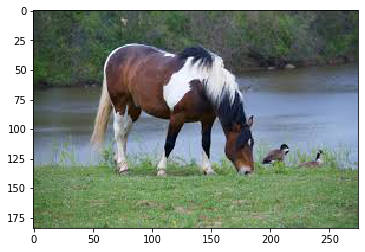

In [61]:
plt.imshow(a)

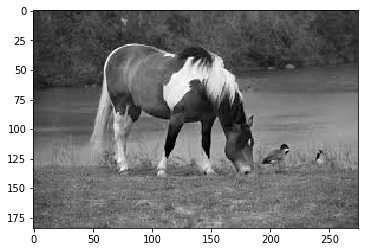

In [62]:
plt.imshow(a[:,:,0], cmap="gray")

In [67]:
a_red = a.copy()

In [68]:
a_red[:,:,1] = 0
a_red[:,:,2] = 0

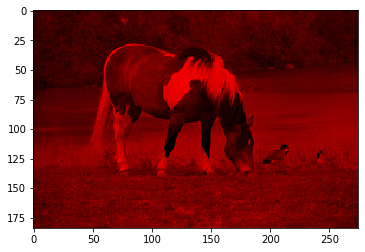

In [70]:
plt.imshow(a_red)

In [72]:
import skimage
import skimage.transform

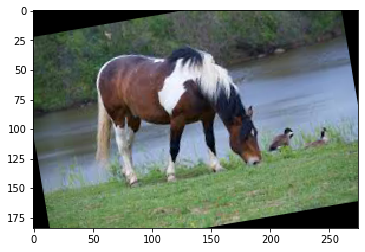

In [74]:
plt.imshow(skimage.transform.rotate(a, 10))

In [76]:
import numpy as np

In [85]:
noise = np.random.random(a.shape) * 0.1

In [86]:
noise.shape

(184, 275, 3)

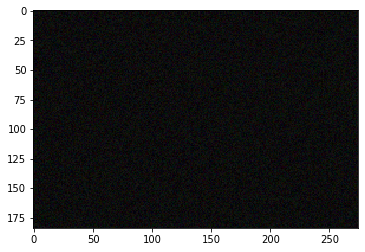

In [87]:
plt.imshow(noise)

In [75]:
a + 

Array([[[ 51,  62,  54],
        [ 46,  57,  49],
        [ 41,  52,  44],
        ...,
        [ 63,  75,  71],
        [ 62,  74,  70],
        [ 61,  73,  69]],

       [[ 53,  64,  56],
        [ 52,  63,  55],
        [ 50,  61,  53],
        ...,
        [ 54,  67,  58],
        [ 54,  67,  58],
        [ 53,  66,  57]],

       [[ 49,  60,  52],
        [ 53,  64,  56],
        [ 55,  66,  58],
        ...,
        [ 52,  66,  51],
        [ 52,  66,  51],
        [ 52,  66,  51]],

       ...,

       [[107, 124,  92],
        [106, 126,  91],
        [104, 125,  84],
        ...,
        [ 70, 102,  65],
        [ 69, 101,  64],
        [ 67,  98,  64]],

       [[ 83, 100,  68],
        [ 90, 110,  75],
        [ 98, 119,  78],
        ...,
        [ 87, 118,  84],
        [ 87, 118,  84],
        [ 85, 116,  84]],

       [[ 82,  99,  67],
        [ 81, 101,  64],
        [ 83, 104,  63],
        ...,
        [ 80, 114,  81],
        [ 84, 118,  85],
        [ 90, 123,  92]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


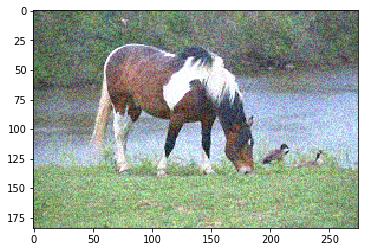

In [89]:
noise = np.random.random(a.shape) * 0.3
plt.imshow(a / 255 + noise)

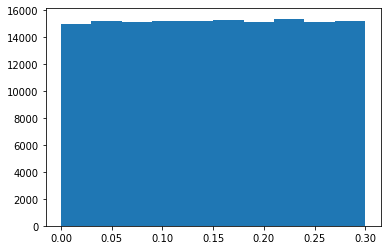

In [91]:
plt.hist(noise.flatten());

In [93]:
a.dtype

dtype('uint8')

In [95]:
f = open("/tmp/horse.npz", "wb")

In [96]:
np.savez(f, a)

In [97]:
f.close()

In [98]:
f = open("/tmp/horse.npz", "rb")

In [100]:
a2 = np.load(f)

In [101]:
a2.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x12959a990>)

In [102]:
a.shape

(184, 275, 3)

In [103]:
np.prod(a.shape)

151800